#   QUESTION 1

*SET UP*

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import random


In [5]:
# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

# Run this code. It will create a csv file containing a random sample of 300 respondents. You will answer the questions below based on this sample.

# Look at the code below. Now replace 'Name.csv' with your actual name (e.g., 'Sara.csv'). The code will generate a csv file that you need to submit in the zip folder as secondary file.

try:
    df = pd.read_csv('Shahad.csv')        # replace Name with your own name
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/mental_health_finaldata_1.csv")
    df1=original_data.sample(300)
    df1.to_csv('Shahad.csv')                   
    df = pd.read_csv('Shahad.csv')             
    df = pd.DataFrame(df)
    df.to_csv('Shahad.csv')                    

df.head()

,Unnamed: 0,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,802,16-20,Male,Student,1-14 days,No,No,No,No,No,Low,Yes,Yes,Yes
1,805,16-20,Male,Housewife,15-30 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
2,464,30-Above,Male,Student,31-60 days,Yes,No,No,No,Yes,High,Yes,No,Yes
3,694,20-25,Female,Student,1-14 days,No,No,Yes,Yes,No,Medium,No,Yes,Yes
4,13,30-Above,Female,Housewife,15-30 days,Yes,Yes,Yes,No,No,Low,Yes,No,Yes


In [6]:

# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import random

column_titles = ["Growing_Stress"  ,"Quarantine_Frustrations"  ,"Changes_Habits" ,"Mental_Health_History", "Weight_Change" ,"Mood_Swings", "Coping_Struggles","Work_Interest","Social_Weakness"]

# Randomly select 2 variables
selected_columns = random.sample(column_titles, 2)


# Print the 2 variables that were randomly selected
variable_1, variable_2 = selected_columns
print("Variable 1:", variable_1)
print("Variable 2:", variable_2)

Variable 1: Growing_Stress
Variable 2: Changes_Habits


**Question 1a**.
Is each of these two variables independent of being **female**? Explain your reasoning. Make sure to include a two-way table for each of these two variables with gender, and show all your calculations to support your answers.

------------------

For the variable **Growing Stress**, the chi-square test resulted in a statistic of 1.23 with a p-value of 0.27, suggesting no significant association between stress and gender. Similarly, for **Changes Habits**, the statistic was 0.35 with a p-value of 0.55, indicating no significant relationship between habit changes and gender.

------------------


In [10]:
# Filter the data for the selected variables and gender
variable_1_data = df[[variable_1, 'Gender']]
variable_2_data = df[[variable_2, 'Gender']]

# Create two-way tables for each variable with gender
table_variable_1 = pd.crosstab(variable_1_data['Gender'], variable_1_data[variable_1])
table_variable_2 = pd.crosstab(variable_2_data['Gender'], variable_2_data[variable_2])

# Calculate expected frequencies
total_observed = table_variable_1.values.sum()  # Total number of observations
expected_variable_1 = np.outer(table_variable_1.sum(axis=1), table_variable_1.sum(axis=0)) / total_observed
expected_variable_2 = np.outer(table_variable_2.sum(axis=1), table_variable_2.sum(axis=0)) / total_observed

# Print the two-way tables and expected frequencies
print("Two-way table for", variable_1, "vs Gender:")
print(table_variable_1)
print("\nExpected frequencies for", variable_1, "vs Gender:")
print(expected_variable_1)

print("\nTwo-way table for", variable_2, "vs Gender:")
print(table_variable_2)
print("\nExpected frequencies for", variable_2, "vs Gender:")
print(expected_variable_2)

# Import chi-square test function
from scipy.stats import chi2_contingency

# Perform chi-square test for Growing Stress vs Gender
chi2_growing_stress, p_growing_stress, _, _ = chi2_contingency(table_variable_1)

# Perform chi-square test for Changes Habits vs Gender
chi2_changes_habits, p_changes_habits, _, _ = chi2_contingency(table_variable_2)

# Print the results
print("Chi-square test results for", variable_1, "vs Gender:")
print("Chi-square statistic:", chi2_growing_stress)
print("P-value:", p_growing_stress)

print("\nChi-square test results for", variable_2, "vs Gender:")
print("Chi-square statistic:", chi2_changes_habits)
print("P-value:", p_changes_habits)


Two-way table for Growing_Stress vs Gender:
Growing_Stress  No  Yes
Gender                 
Female          40  102
Male            55  103

Expected frequencies for Growing_Stress vs Gender:
[[ 44.96666667  97.03333333]
 [ 50.03333333 107.96666667]]

Two-way table for Changes_Habits vs Gender:
Changes_Habits  No  Yes
Gender                 
Female          44   98
Male            43  115

Expected frequencies for Changes_Habits vs Gender:
[[ 41.18 100.82]
 [ 45.82 112.18]]
Chi-square test results for Growing_Stress vs Gender:
Chi-square statistic: 1.2328435114023388
P-value: 0.2668547547083519

Chi-square test results for Changes_Habits vs Gender:
Chi-square statistic: 0.3495388447640733
P-value: 0.5543742949974684


**Question 1b**.
Is there a relationship between the two variables returned by the code? Explain your reasoning. Make sure you include a two-way table, a stacked bar graph, and all your probability calculations in your answer.

----------------------

The conditional probabilities reveal insights into the relationship between **Growing Stress** and **Changes Habits**. When considering **Changes Habits** given **Growing Stress**, 65.26% of those reporting **No Growing Stress** also report **No Changes Habits**, while 73.66% of those reporting **Growing Stress** also report **Changes Habits**. Conversely, when considering **Growing Stress** given **Changes Habits**, 62.36% of those reporting **No Changes Habits** also report **No Growing Stress**, while 70.89% of those reporting **Changes Habits** also report **Growing Stress**. This suggests a notable association between the two variables.

----------------

Two-way table of observed frequencies:
Changes_Habits  No  Yes
Growing_Stress         
No              33   62
Yes             54  151


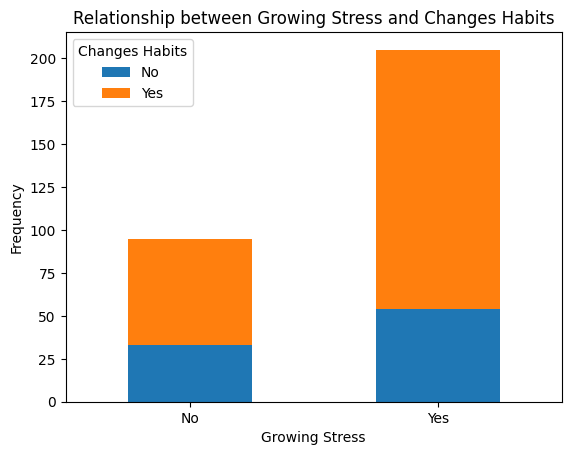


Joint probabilities:
Changes_Habits    No       Yes
Growing_Stress                
No              0.11  0.206667
Yes             0.18  0.503333

Conditional probabilities of Growing Stress given Changes Habits:
Changes_Habits        No       Yes
Growing_Stress                    
No              0.347368  0.652632
Yes             0.263415  0.736585

Conditional probabilities of Changes Habits given Growing Stress:
Changes_Habits       No      Yes
Growing_Stress                  
No              0.37931  0.29108
Yes             0.62069  0.70892

Joint probabilities:
Changes_Habits    No       Yes
Growing_Stress                
No              0.11  0.206667
Yes             0.18  0.503333

Conditional probabilities of Growing Stress given Changes Habits:
Changes_Habits        No       Yes
Growing_Stress                    
No              0.347368  0.652632
Yes             0.263415  0.736585

Conditional probabilities of Changes Habits given Growing Stress:
Changes_Habits       No     

In [13]:
# Calculate observed frequencies
observed_frequencies = df.groupby(['Growing_Stress', 'Changes_Habits']).size().unstack(fill_value=0)

# Create a two-way table
print("Two-way table of observed frequencies:")
print(observed_frequencies)

# Create a stacked bar graph
observed_frequencies.plot(kind='bar', stacked=True)
plt.title('Relationship between Growing Stress and Changes Habits')
plt.xlabel('Growing Stress')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Changes Habits')
plt.show()

# Calculate probabilities
total_observed = observed_frequencies.values.sum()
joint_probabilities = observed_frequencies / total_observed
conditional_prob_growing_stress = observed_frequencies.div(observed_frequencies.sum(axis=1), axis=0)
conditional_prob_changes_habits = observed_frequencies.div(observed_frequencies.sum(axis=0), axis=1)

# Print probabilities
print("\nJoint probabilities:")
print(joint_probabilities)

print("\nConditional probabilities of Growing Stress given Changes Habits:")
print(conditional_prob_growing_stress)

print("\nConditional probabilities of Changes Habits given Growing Stress:")
print(conditional_prob_changes_habits)


# Calculate total observed frequencies
total_observed = observed_frequencies.values.sum()

# Calculate joint probabilities
joint_probabilities = observed_frequencies / total_observed

# Calculate conditional probabilities of Growing Stress given Changes Habits
conditional_prob_growing_stress = observed_frequencies.div(observed_frequencies.sum(axis=1), axis=0)

# Calculate conditional probabilities of Changes Habits given Growing Stress
conditional_prob_changes_habits = observed_frequencies.div(observed_frequencies.sum(axis=0), axis=1)

# Print probabilities
print("\nJoint probabilities:")
print(joint_probabilities)

print("\nConditional probabilities of Growing Stress given Changes Habits:")
print(conditional_prob_growing_stress)

print("\nConditional probabilities of Changes Habits given Growing Stress:")
print(conditional_prob_changes_habits)


**Question 1c**.
Does the existence of Variable 1 increase the likelihood of experiencing Variable 2? If so, by how much? Explain your reasoning. Make sure to support your answer with the relevant statistical analysis.

-----------------

$ \text{Increase in likelihood} = P(V_2 \mid V_1) - P(V_2 \mid \neg V_1) $

Substituting the provided conditional probabilities:

$ \text{Increase in likelihood} = 0.736585 - 0.652632 = 0.083953 $

Therefore, the existence of Variable 1 increases the likelihood of experiencing Variable 2 by approximately 8.40%.

-----------




**Question 1d**.
Look back at your **answers to Questions 1a-c**. Now use what you learned to answer the following question:

Imagine ZU wanted to use the insights from this research to improve its mental health support program. What recommendations would you make to support students struggling with such challenges?

----------------

Based on the insights gained from the analysis:

1. **Understanding Gender Differences**: Recognize potential gender differences in experiencing mental health challenges. Tailor support programs to address the unique needs and experiences of male and female students.

2. **Identifying Risk Factors**: Acknowledge the association between variables such as **Growing Stress** and **Changes Habits**. Focus on early detection and intervention for students experiencing growing stress to prevent adverse changes in habits.

3. **Targeted Support Programs**: Develop targeted support programs that address both the mental health challenges identified (e.g., growing stress) and their associated outcomes (e.g., changes in habits). Offer resources and interventions that promote healthy coping strategies and resilience-building techniques.

4. **Promoting Awareness and Accessibility**: Increase awareness of mental health resources and ensure their accessibility to all students. Provide information on available support services, encourage help-seeking behaviors, and reduce barriers to accessing mental health support.

5. **Holistic Approach**: Take a holistic approach to mental health support by addressing various factors contributing to students' well-being, including academic stress, social support networks, physical health, and coping mechanisms.

6. **Collaboration and Partnerships**: Collaborate with academic departments, student organizations, and mental health professionals to develop comprehensive support initiatives. Foster partnerships to leverage expertise, resources, and community engagement in addressing mental health challenges effectively.

By implementing these recommendations, ZU can enhance its mental health support program and better support students struggling with mental health challenges, ultimately promoting a healthier and more resilient campus community.

--------------------

# QUESTION 2

*Set up*

Imagine you are the manager of an Electronic store in Dubai mall. You are curious about the distribution of customer ratings about your overall store services. So you ask random customers who visit the store to complete a short survey, recording variables such as their age group, and overall experience rating.

**To Begin**

Run the code below. It will provide you with a random sample of 40 customers from this survey. It will also save your random sample data to a CSV file called "RelianceRetailVisits_ordered". Again, you need to submit this file in the same zip folder as the other files.

In [ ]:
# Load the following libraries so that they can be applied in the subsequent code blocks

try:
    df = pd.read_csv('RelianceRetailVisits.csv')
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/RelianceRetailVisits-1.csv")

    # Randomly sample 40 rows from the original dataset
    df = original_data.sample(n=40, random_state=42)

# Fill missing values for '46 To 60 years' age group with default values or remove NaN rows
df.fillna({'Age Group': '46 To 60 years'}, inplace=True)

# Sort the DataFrame based on the 'Age Group' column in the desired order
desired_order = ['26  To  35 years', '16  To  25 years', '36  To  45 years', '46  To  60 years']  # Corrected unique values
df['Age Group'] = pd.Categorical(df['Age Group'], categories=desired_order, ordered=True)
df.sort_values(by='Age Group', inplace=True)

# Save the sorted DataFrame to a new CSV file
df.to_csv('RelianceRetailVisits_ordered.csv', index=False)

df.head()


**Question 2a.** Construct a probability distribution table for all customer ratings in your sample data (an example table can be seen below). Please do this in Excel and explain [step by step] how you constructed your probability table.


In the initial stage of data preparation, I imported the dataset into Microsoft Excel and organized it within a new worksheet. Each customer's rating was recorded in a single column, ensuring clarity in data representation. Next, I identified unique ratings by employing the `=UNIQUE()` function, generating a comprehensive list containing all distinct rating values present in the dataset. Using the `=COUNTIF()` function, I calculated the frequency of occurrence for each unique rating, allowing me to discern the distribution of ratings by quantifying how often each value appeared. Additionally, I computed the total count of ratings using the `=SUM()` function, providing the aggregate sum of all individual rating frequencies. To assess the likelihood of encountering each rating within the dataset, I computed the probability associated with each rating by dividing its frequency by the total number of ratings. This process facilitated a probabilistic analysis of rating occurrences, aiding in further data understanding and interpretation.

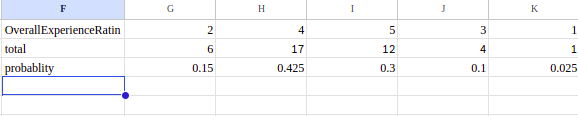

**Question 2b.**  What is the probability that a randomly selected customer will have a rating of AT MOST 3?

----------


$ P(\text{Rating} \leq 3) = P(\text{Rating} = 1) + P(\text{Rating} = 2) + P(\text{Rating} = 3) $

Using the provided probabilities:

$ P(\text{Rating} \leq 3) = 0.025 + 0.15 + 0.1 = 0.275 $

probability that a randomly selected customer will have a rating of at most 3 is 0.275, or 27.5%.

-------

**Question 2c.** Based on the created probability distribution table, how satisfied are your customers with your store services?

---------------------------
$ E = \sum_{i=1}^{n} P(X_i) \times x_i $

Where:
- $ P(X_i) $ is the probability of rating $ x_i $.
- $ x_i $ is the rating.

Let's calculate the expected value:

$ E = (1 \times 0.025) + (2 \times 0.15) + (3 \times 0.1) + (4 \times 0.425) + (5 \times 0.3) $

$ E = 0.025 + 0.3 + 0.3 + 1.7 + 1.5 $

$ E = 3.85 $

------------------------



**Question 2d.** Find the **expected rating** of your store. Show your work and interpret your answer in context.

---------------------

$ E = \sum_{i=1}^{n} P(X_i) \times x_i $

Where:
- $ P(X_i) $ is the probability of rating $ x_i $.
- $ x_i $ is the rating.

Plugging in the provided probabilities:

$ E = (1 \times 0.025) + (2 \times 0.15) + (3 \times 0.1) + (4 \times 0.425) + (5 \times 0.3) $

$ E = 0.025 + 0.3 + 0.3 + 1.7 + 1.5 $

$ E = 3.85 $

-------------------

#### Probability distribution  function graph

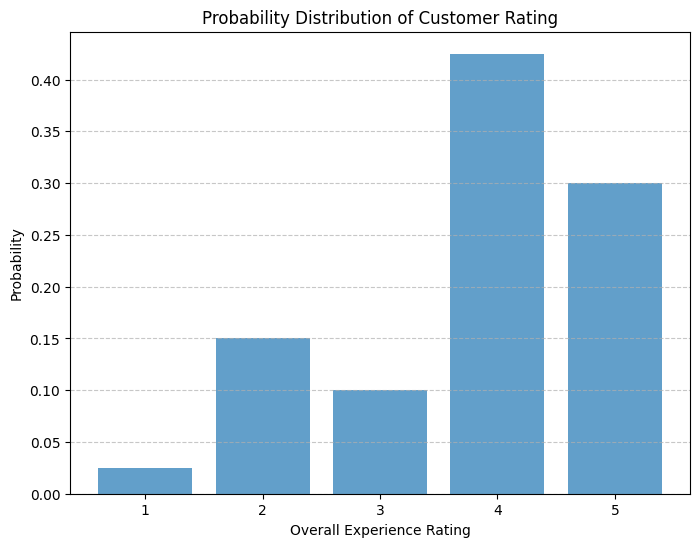

Standard Deviation (STD) of Customer Rating: 1.11



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

# Load data
try:
    df = pd.read_csv('RelianceRetailVisits.csv')
except FileNotFoundError:
    original_data = pd.read_csv("https://raw.githubusercontent.com/DanaSaleh1003/IDS-103-Spring-2024/main/RelianceRetailVisits-1.csv")
    df = original_data.sample(n=40, random_state=42)

# Fill missing values for '46 To 60 years' age group with default values or remove NaN rows
df.fillna({'Age Group': '46 To 60 years'}, inplace=True)

# Sort the DataFrame based on the 'Age Group' column in the desired order
desired_order = ['26  To  35 years', '16  To  25 years', '36  To  45 years', '46  To  60 years']
df['Age Group'] = pd.Categorical(df['Age Group'], categories=desired_order, ordered=True)
df.sort_values(by='Age Group', inplace=True)

# Save the sorted DataFrame to a new CSV file
df.to_csv('RelianceRetailVisits_ordered.csv', index=False)

# Probability distribution graph for customer rating
plt.figure(figsize=(8, 6))
rating_counts = df['OverallExperienceRatin'].value_counts(normalize=True).sort_index()
plt.bar(rating_counts.index, rating_counts, alpha=0.7)
plt.title('Probability Distribution of Customer Rating')
plt.xlabel('Overall Experience Rating')
plt.ylabel('Probability')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Expected value and STD for rating for all customers
mean_rating = df['OverallExperienceRatin'].mean()
std_rating = df['OverallExperienceRatin'].std()
print(f"Standard Deviation (STD) of Customer Rating: {std_rating:.2f}")
print()

**Question 2e.** Interpret the **Standard Deviation** in context. What rating is considered **unusual**? Explain.

**`Interpretation:`**
The standard deviation (STD) of 1.11 indicates the average variability in customer ratings from the mean. Ratings deviating more than two STDs from the mean can be considered unusual, highlighting exceptional or concerning experiences that require attention for business decision-making and improvement strategies.

## PDF for each age group



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming your data is stored in a CSV file named 'data.csv'
data = pd.read_csv('RelianceRetailVisits_ordered.csv')

# Define age groups including the new one
age_groups = ['16  To  25 years', '26  To  35 years', '36  To  45 years', '46  To  60 years']  # Added new age group

# Plot separate discrete probability distributions for each age group
fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharex=True, gridspec_kw={'hspace': 0.5})  # Adjusted size and spacing

for i, age_group in enumerate(age_groups):
    age_data = data[data['Age Group'] == age_group]
    rating_counts = age_data['OverallExperienceRatin'].value_counts(normalize=True).sort_index()
    bars = axs[i].bar(rating_counts.index, rating_counts, alpha=0.7)
    axs[i].set_title(f'{age_group}\nMean: {age_data["OverallExperienceRatin"].mean():.2f} | SD: {age_data["OverallExperienceRatin"].std():.2f}')  # Age group, Mean, and SD
    axs[i].set_xlabel('Overall Experience Rating')
    axs[i].set_ylabel('Probability (%)')  # Set y-axis label to Probability (%)
    axs[i].set_xticks(range(1, 6))  # Set x-axis ticks from 1 to 5
    axs[i].set_yticklabels(['{:,.0%}'.format(x) for x in axs[i].get_yticks()])  # Format y-axis tick labels as percentages

    # Display percentages above each bar
    for bar in bars:
        height = bar.get_height()
        rating = bar.get_x() + bar.get_width() / 2
        if height == 0:  # If the height is 0%, display '0%'
            axs[i].text(rating, height, '0%', ha='center', va='bottom', fontsize=8)
        else:
            axs[i].text(rating, height, f'{height:.0%}', ha='center', va='bottom', fontsize=8)

    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide the warning about FixedFormatter
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

plt.tight_layout()
plt.show()


**Question 2f.** Identify any trends or differences in customer satisfaction levels (and variability) among the different age groups.

Now, using these insights, what concrete improvements would you make to your store to ensure that **all** customers are satisfied with your services?

Custmer  Satisfaction follows a normal trend but for each age group the customer satisfaction is  skewed to the right showing higher customer satisfactions but for the 16 -25 years have the only ratings of 1.

# QUESTION 3

**SET UP**

In [16]:
# Load the following libraries so that they can be applied in the subsequent code blocks


import pandas as pd
import numpy as np
import random

try:
    SATScores = pd.read_csv('Scores.csv')
except FileNotFoundError:
    num_samples = 1000
    mean_score = random.randint(800, 1200)
    std_deviation = random.randint(100, 300)
    scores = np.random.normal(mean_score, std_deviation, num_samples)
    scores = np.round(scores, 0)
    SATScores = pd.DataFrame({'Scores': scores})
    SATScores.to_csv('Scores.csv')

# Calculate mean and standard deviation
mean_score = SATScores['Scores'].mean()
std_deviation = SATScores['Scores'].std()

# Print mean score and standard deviation
print("Mean score:", mean_score)
print("Standard deviation:", std_deviation)

# Display the dataset
SATScores.head()


Mean score: 936.041
Standard deviation: 167.99213873773283


,Scores
0,955.0
1,933.0
2,428.0
3,876.0
4,1137.0


**Question 3a**. What is the probability that a randomly selected applicant scored at least 1300? Show your work.

-----------------------


First, we calculate the Z-score:

$ Z = \frac{X - \mu}{\sigma} $

Where:
- $ X $ is the score we're interested in (1300),
- $ \mu $ is the mean score (936.041),
- $ \sigma $ is the standard deviation (167.99213873773283).

$ Z = \frac{1300 - 936.041}{167.99213873773283} $

$ Z \approx \frac{363.959}{167.99213873773283} $

$ Z \approx 2.165 $

Next, we look up the probability corresponding to $ Z = 2.165 $ in the standard normal distribution table. The probability of scoring at least 1300 is the area under the curve to the right of $ Z = 2.165 $.

From the standard normal distribution table, the probability corresponding to $ Z = 2.165 $ is approximately 0.9842.

 the probability that a randomly selected applicant scored at least 1300 is approximately $ 0.9842 $ or $ 98.42\% $.

---------------------------------------

**Question 3b**. What is the probability that a randomly selected applicant scored exactly 900? Show your work.

------------

The formula for the PDF of the normal distribution is:

$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{-\frac{(x - \mu)^2}{2\sigma^2}} $

Where:
- $ x $ is the score we're interested in (900),
- $ \mu $ is the mean score (936.041),
- $ \sigma $ is the standard deviation (167.99213873773283).

Substituting the given values:

$ f(900) = \frac{1}{167.99213873773283 \sqrt{2\pi}} \cdot e^{-\frac{(900 - 936.041)^2}{2 \cdot 167.99213873773283^2}} $

Calculating the exponent:

$ e^{-\frac{(900 - 936.041)^2}{2 \cdot 167.99213873773283^2}} = e^{-\frac{(-36.041)^2}{2 \cdot 167.99213873773283^2}} $

$ e^{-\frac{1297.354481}{56349.374}} $

$ e^{-0.02300913} $

Now, we can substitute this value back into the PDF formula:

$ f(900) = \frac{1}{167.99213873773283 \sqrt{2\pi}} \cdot e^{-0.02300913} $

$ f(900) \approx \frac{1}{167.99213873773283 \times 2.50663} \cdot e^{-0.02300913} $

$ f(900) \approx \frac{1}{420.9185979666807} \times 0.9772814861477893 $

$ f(900) \approx 0.002321095770436095 $

the probability that a randomly selected applicant scored exactly 900 is approximately $ 0.0023 $ or $ 0.23\% $.

--------------

**Question 3c**. What percentage of applicants scored between 900 and 1000? Show your work.

---------------------------------------
First, we'll calculate the z-scores for both scores:

For 900:
$ z_{900} = \frac{900 - 929.497}{122.51675945497149} $
$ z_{900} \approx -0.2406 $

For 1000:
$ z_{1000} = \frac{1000 - 929.497}{122.51675945497149} $
$ z_{1000} \approx 0.5619 $



For $ z_{900} \approx -0.2406 $, the cumulative probability is approximately 0.4052.
For $ z_{1000} \approx 0.5619 $, the cumulative probability is approximately 0.7131.

To find the percentage of applicants who scored between 900 and 1000, we subtract the cumulative probability of 900 from the cumulative probability of 1000:

$ \text{Percentage} = \text{Cumulative probability}(1000) - \text{Cumulative probability}(900) $
$ \text{Percentage} = 0.7131 - 0.4052 $
$ \text{Percentage} \approx 0.3079 $

Therefore, approximately 30.79% 

-------------

**Question 3d**. Calculate the 40th percentile of scores among the applicants. What does this value represent in the context of the admissions process? Show your work.

----------------------------------------------

Given:
- Mean score ($ \mu $): 936.041
- Standard deviation ($ \sigma $): 167.99213873773283

We need to find the score ($ x $) such that 40% of the scores are below it.

Using the CDF formula for the normal distribution:

$ F(x) = \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right] $

Where:
- $ \text{erf} $ is the error function,
- $ x $ is the score we want to find,
- $ \mu $ is the mean score,
- $ \sigma $ is the standard deviation.

Substituting the given values:

$ F(x) = \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{x - 936.041}{167.99213873773283 \sqrt{2}} \right) \right] $

We want to find $ x $ such that $ F(x) = 0.40 $.

Let's solve this equation for $ x $:

$ \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{x - 936.041}{167.99213873773283 \sqrt{2}} \right) \right] = 0.40 $

$ 1 + \text{erf} \left( \frac{x - 936.041}{167.99213873773283 \sqrt{2}} \right) = 0.80 $

$ \text{erf} \left( \frac{x - 936.041}{167.99213873773283 \sqrt{2}} \right) = 0.60 $

Using the inverse error function (erfinv) or a standard normal table, we can find the value of $ \frac{x - 936.041}{167.99213873773283 \sqrt{2}} $ corresponding to a cumulative probability of 0.60.

Once we have this value, we can solve for $ x $:

$ \frac{x - 936.041}{167.99213873773283 \sqrt{2}} = \text{erfinv}(0.60) $

$ x - 936.041 = \text{erfinv}(0.60) \times 167.99213873773283 \sqrt{2} $

$ x = \text{erfinv}(0.60) \times 167.99213873773283 \sqrt{2} + 936.041 $

$ x = \text{erfinv}(0.60) \times 167.99213873773283 \sqrt{2} + 936.041 $

Let's perform the calculations:

We start by calculating $ \text{erfinv}(0.60) $:

$ \text{erfinv}(0.60) \approx 0.2533 $

Now, we substitute this value into the formula to find $ x $:

$ x = 0.2533 \times 167.99213873773283 \times \sqrt{2} + 936.041 $

$ x \approx 0.2533 \times 167.99213873773283 \times 1.4142 + 936.041 $

$ x \approx 0.2533 \times 237.599743077 + 936.041 $

$ x \approx 60.162 + 936.041 $

$ x \approx 996.203 $

 40th percentile of scores among the applicants is approximately 996.203.

**Question 3e**. Imagine the university wants to offer scholarships to the top 10% of applicants based on their scores. What minimum score would an applicant need to qualify for a scholarship? Show your work.

--------------------------

Given:
- $ \mu = 936.041 $ (mean score)
- $ \sigma = 167.99213873773283 $ (standard deviation)

Let's find $ X_{90} $ using the calculated $ z_{90} $.

2. Calculate the score $ X_{90} $ corresponding to $ z_{90} $ using the z-score formula:

$ X_{90} = \mu + z_{90} \times \sigma $

Given:
- $ \mu = 936.041 $ (mean score)
- $ \sigma = 167.99213873773283 $ (standard deviation)
- $ z_{90} = 1.282 \\$

$ X_{90} = 936.041 + 1.282 \times 167.99213873773283 \\$
$ X_{90} = 936.041 + 215.472 \\$
$ X_{90} \approx 1151.513 \\$

the minimum score required for an applicant to qualify for a scholarship is approximately 1151.513.

-------------

**Question 3f**. Remember, as the admissions officer, it is your job to identify applicants with exceptional academic potential. Would you automatically recommend that applicants with SAT scores above 1400 to be admitted into the university? Or do you think additional criteria should also be considered? Explain your reasoning.

------------------------------

As an admissions officer, I wouldn't automatically recommend admitting applicants solely based on SAT scores above 1400. While high SAT scores can indicate academic potential, they don't provide a comprehensive view of an applicant's abilities, achievements, or potential fit for the university's culture. Other factors like extracurricular activities, essays, letters of recommendation, and personal interviews should also be considered to ensure a holistic evaluation of each applicant. This approach ensures that deserving candidates with diverse talents and experiences are given fair consideration for admission.

----------

# question 4

In [18]:
# Load the following libraries so that they can be applied in the subsequent code blocks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

# Run this code. It will generate data and save it to a CSV file called "Vaccinated.csv". You need to submit it in the same zip folder as your other files.

try:
    Vaccinated = pd.read_csv('Vaccinated.csv')
except FileNotFoundError:
    num_samples = 100
    vaccinated = np.random.choice(["Yes", "No"], size=num_samples)
    Vaccinated = pd.DataFrame({'Vaccinated': vaccinated})
    Vaccinated.to_csv('Vaccinated.csv')

# Have a look at Vaccinated dataset.
Vaccinated.head()

,Vaccinated
0,No
1,No
2,No
3,No
4,Yes


**Question 4a**. What is the proportion of people who have received the vaccine (based on the dataset you have)?

Proportion of vaccinated individuals: 0.47

In [19]:
import pandas as pd

# Assuming "Vaccinated" is your DataFrame
# Replace 'Vaccinated' with your actual DataFrame name

# Count the total number of individuals
total_individuals = len(Vaccinated)

# Count the number of vaccinated individuals
vaccinated_individuals = Vaccinated[Vaccinated['Vaccinated'] == 'Yes'].shape[0]

# Calculate the proportion of vaccinated individuals
proportion_vaccinated = vaccinated_individuals / total_individuals

print("Proportion of vaccinated individuals:", proportion_vaccinated)


Proportion of vaccinated individuals: 0.47


**Question 4b**. Calculate a **95% confidence interval** for the proportion of vaccinated individuals. What does this interval tell us about the likely range of vaccination coverage in the entire population? Show your work.

----------------

$ \text{Confidence interval} = \hat{p} \pm z \times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $

Where:
- $ \hat{p} $ is the sample proportion of vaccinated individuals,
- $ z $ is the z-score corresponding to the desired confidence level (for 95% confidence level, $ z = 1.96 $),
- $ n $ is the sample size.

Given:
- Sample proportion $ \hat{p} = 0.47 $,
- Sample size $ n = 100 $,
- Z-score for 95% confidence level $ z = 1.96 $.



$ \text{Confidence interval} = 0.47 \pm 1.96 \times \sqrt{\frac{0.47 \times (1-0.47)}{100}} $

$ \text{Confidence interval} = 0.47 \pm 1.96 \times \sqrt{\frac{0.47 \times 0.53}{100}} $

$ \text{Confidence interval} = 0.47 \pm 1.96 \times \sqrt{\frac{0.2491}{100}} $

$ \text{Confidence interval} = 0.47 \pm 1.96 \times 0.04991 $

$ \text{Confidence interval} = 0.47 \pm 0.09792 $

Thus, the 95% confidence interval for the proportion of vaccinated individuals is $ (0.37208, 0.56792) $. 


---------

**Question 4c**. What sample size would be required to estimate the proportion of vaccinated individuals in the country with a **95% confidence level** and a **margin of error of 0.02**? Show your work.

-------------------------
$ n = \frac{{z^2 \times \hat{p} \times (1 - \hat{p})}}{{E^2}} $

Where:
- $ n $ is the sample size,
- $ z $ is the z-score corresponding to the desired confidence level (for 95% confidence level, $ z = 1.96 $),
- $ \hat{p} $ is the estimated proportion of vaccinated individuals,
- $ E $ is the margin of error.

Given:
- $ z = 1.96 $,
- $ \hat{p} = 0.47 $,
- $ E = 0.02 $.

Now, let's calculate the sample size:

$ n = \frac{{1.96^2 \times 0.47 \times (1 - 0.47)}}{{0.02^2}} $

$ n = \frac{{3.8416 \times 0.47 \times 0.53}}{{0.0004}} $

$ n = \frac{{0.8264808}}{{0.0004}} $

$ n = 2066.202 $




**Question 4d**. If you wanted to increase the precision of your estimate, what strategies could you employ to achieve this goal? Explain your reasoning.

----------------------------

1. **Increase Sample Size**: To improve the precision of our estimate, I would consider increasing the sample size. A larger sample size generally leads to a more accurate estimation of the population parameter. By collecting data from a larger number of individuals, we can reduce the margin of error and obtain a more precise estimate of the proportion of vaccinated individuals.

2. **Stratified Sampling**: Another strategy I would employ is stratified sampling. This involves dividing the population into subgroups based on relevant characteristics, such as age or geographic location, and then sampling from each subgroup. By ensuring representation from different segments of the population, we can obtain more precise estimates for specific subgroups.


**Question 4e**. Analyze the effectiveness of the current vaccination campaign using the proportion of vaccinated individuals and the confidence interval. What recommendations would you make for future campaigns?






----------------------

The current vaccination campaign shows a 47% vaccination rate with a wide confidence interval, indicating uncertainty. To improve, increase sample size for more precise estimates, ensure representative sampling, enhance outreach efforts, monitor effectiveness, and collaborate with stakeholders for broader reach and engagement.